In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
DATA_PATH = "/content/drive/Shareddrives/DL_Project/Data"
IMAGES_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_original"
CROPPED_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_cropped"
AUDIO_PATH = "/content/drive/Shareddrives/DL_Project/Data/genres_original"
CREATED_PATH = "/content/drive/Shareddrives/DL_Project/Data/created_images"
'''

'\nDATA_PATH = "/content/drive/Shareddrives/DL_Project/Data"\nIMAGES_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_original"\nCROPPED_PATH = "/content/drive/Shareddrives/DL_Project/Data/images_cropped"\nAUDIO_PATH = "/content/drive/Shareddrives/DL_Project/Data/genres_original"\nCREATED_PATH = "/content/drive/Shareddrives/DL_Project/Data/created_images"\n'

## My local path

In [3]:
DATA_PATH = "./Data"
IMAGES_PATH = "./Data/created_images"

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [4]:
### YOUR CODE HERE
df_three = pd.read_csv(f"{DATA_PATH}/features_3_sec.csv")
df_thirty =  pd.read_csv(f"{DATA_PATH}/features_30_sec.csv")

https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

In [5]:
'''
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to convert audio files to spectrograms
def audio_to_spectrogram(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each audio file in the input folder
    for audio_file in os.listdir(input_folder):
        # Check if the file is an audio file
        if audio_file.endswith(".wav"):
            # Load audio file
            audio_path = os.path.join(input_folder, audio_file)
            y, sr = librosa.load(audio_path)

            # Generate spectrogram
            plt.figure(figsize=(10, 4))
            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
            librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
            plt.axis('off')  # Turn off axis labels
            plt.gca().set_position([0, 0, 1, 1])  # Remove surrounding whitespace
            plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
            plt.margins(0, 0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())

            # Save spectrogram
            spectrogram_path = os.path.join(output_folder, os.path.splitext(audio_file)[0] + '.png')
            plt.savefig(spectrogram_path)
            plt.close()

            print(f"Spectrogram saved: {spectrogram_path}")

# Paths to input and output folders
genre_names = ["hiphop", "metal", "reggae", "blues", "disco", "jazz", "pop", "classical", "rock", "country"]

input_folders = [os.path.join(AUDIO_PATH, genre) for genre in genre_names]
output_folders = [os.path.join(CREATED_PATH, genre) for genre in genre_names]


# Convert audio files to spectrograms for each pair of input and output folders
for input_folder, output_folder in zip(input_folders, output_folders):
    audio_to_spectrogram(input_folder, output_folder)
    '''

'\nimport os\nimport librosa\nimport librosa.display\nimport matplotlib.pyplot as plt\n\n# Function to convert audio files to spectrograms\ndef audio_to_spectrogram(input_folder, output_folder):\n    # Create output folder if it doesn\'t exist\n    if not os.path.exists(output_folder):\n        os.makedirs(output_folder)\n\n    # Iterate through each audio file in the input folder\n    for audio_file in os.listdir(input_folder):\n        # Check if the file is an audio file\n        if audio_file.endswith(".wav"):\n            # Load audio file\n            audio_path = os.path.join(input_folder, audio_file)\n            y, sr = librosa.load(audio_path)\n\n            # Generate spectrogram\n            plt.figure(figsize=(10, 4))\n            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)\n            librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis=\'mel\', fmax=8000, x_axis=\'time\')\n            plt.axis(\'off\')  # Turn off axis labels\n     

### Three second audio clips

In [6]:
df_three

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [95]:
df_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

### Thirty Second Audio Clips

In [96]:
df_thirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [97]:
df_thirty.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


### Loading Images as training data

Images are read into RGBA, where A is transparency. As seen below, all transparency values are 255. We can get rid of them.

In [10]:
import os
import numpy as np
from PIL import Image

# Define genres
genres = df_three.label.unique()

# Function to load images from directory
def load_images(root_folder, genres):
    images = []
    y = []
    for genre in genres:
      img_temp, y_temp = load_images_from_genre(root_folder, genre)
      images.extend(img_temp)
      y.extend(y_temp)
    return np.array(images), np.array(y)

def load_images_from_genre(root_folder, genre):
    images = []
    folder = root_folder+f"/{genre}"
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))

        # Get rid of 'A' in 'RGBA'
        img = img.convert("RGB")
        if img is not None:
            img = np.array(img)
            images.append(img)
    images = np.stack(images)
    return np.array(images), np.array([genre]*images.shape[0]).reshape(-1, 1)

# Load images that we created

X, y = load_images(IMAGES_PATH, genres)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


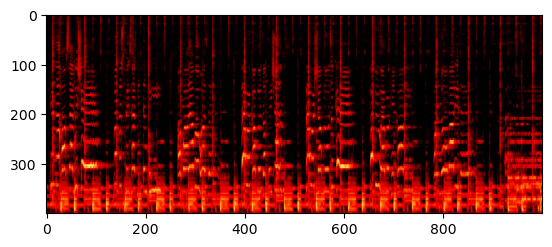

In [90]:
plt.imshow(X[np.random.randint(0, X.shape[0])])

### One Hot Encode, Normalize, Flatten

In [12]:
image_dimensions = X.shape[1:3]
image_dimensions

(400, 1000)

In [13]:
X = ((X / 255.0)*2.0)-1
X.shape

(999, 400, 1000, 3)

Making sure images are normalized to [-1.0, 1.0]

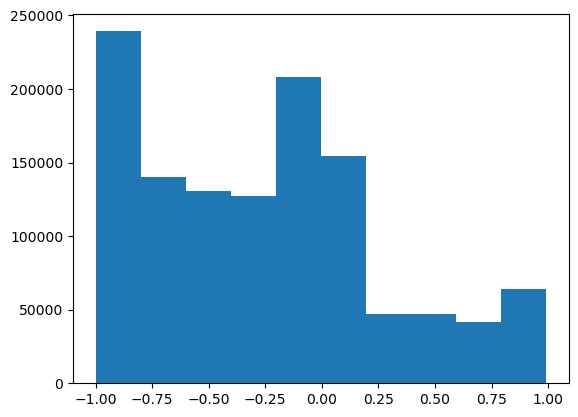

In [14]:
plt.hist(X[0].flatten())
plt.show()

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Use stratify to evenly split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (799, 400, 1000, 3)
Shape of X_test: (200, 400, 1000, 3)
Shape of y_train: (799, 1)
Shape of y_test: (200, 1)


In [16]:
# Checking for ~ evenly distributed test, training classes
print(np.unique(y_train, return_counts=True)[1])
print(np.unique(y_test, return_counts=True)[1])

[80 80 80 79 80 80 80 80 80 80]
[20 20 20 20 20 20 20 20 20 20]


In [17]:
genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

# Implementing the CNN

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import Lambda
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim


# Define custom dataset in order to have a dataset + dataloader
class CustomDataset(Dataset):
    def __init__(self, x_train, y_train, transform=None, target_transform=None):
        self.x_train = x_train
        self.y_train = y_train
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image = self.x_train[idx]
        label = self.y_train[idx]

        if self.transform:
            image = self.transform(image)
        
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

# Converting data to tensors
X_train = torch.from_numpy(X_train).float()
# Change shape of data to be in the format (batch_size, channels, height, width)
X_train = X_train.permute(0,3,1,2)
X_train = X_train.type(torch.float32)

X_test = torch.from_numpy(X_test).float()
# Change shape of data to be in the format (batch_size, channels, height, width)
X_test = X_test.permute(0,3,1,2)
X_test = X_test.type(torch.float32)

# Encoding labels
label_encoder = LabelEncoder()
label_encoder.fit(genres)

BATCH_SIZE = 50

target_transform = Lambda(lambda y: label_encoder.transform(y))

train_dataset = CustomDataset(X_train, y_train, transform=None, target_transform=target_transform)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = CustomDataset(X_test, y_test, transform=None,  target_transform=target_transform)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Send to device, remove from colab

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [40]:
def train(temp_model, criterion_temp, optimizer_temp,epochs=90, val_dataloader=None, train_dataloader=None, verbose = True):
    for epoch in range(epochs):
            temp_model.train()
            train_loss = 0.0
            for i, (inputs, labels) in enumerate(train_dataloader):
                optimizer_temp.zero_grad()
                inputs = inputs.to(device)
                labels = labels.to(device).squeeze(1)
                outputs = temp_model(inputs)
                loss = criterion_temp(outputs, labels)
                loss.backward()
                optimizer_temp.step()
                train_loss += loss.item()
            if verbose:
                 print(f'Epoch: {epoch+1}, Loss: {train_loss/(i+1.0)}')

            # validation
            temp_model.eval()
            with torch.no_grad():
                val_loss = 0.0
                val_losses = []
                i=0
                for i, (inputs, labels) in enumerate(val_dataloader):
                    inputs = inputs.to(device)
                    labels = labels.to(device).squeeze(1)
                    outputs = temp_model(inputs)
                    loss = criterion_temp(outputs, labels)
                    val_loss += loss.item()
                    val_losses.append(loss.item())
                if verbose: 
                     print(f'Epoch: {epoch+1}, Validation Loss: {val_loss/(i+1.0)}')
    return val_losses

## Hyperparameter Search

In [45]:
import optuna
import torch.nn.init as init

class Net_to_opt(nn.Module):
    def __init__(self,dropout_p=0.5, n_fc_layers = 1, hidden_weights = [], kernel3=5, kernel4=5, initializer=False):
        super().__init__()
        self.dropout_p = dropout_p

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16,
                                kernel_size=3, stride=2, padding=1)
        if initializer: init.kaiming_normal_(self.conv1.weight)  # He initialization
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32,
                                kernel_size=3 , stride=2, padding=1)
        if initializer: init.kaiming_normal_(self.conv2.weight)  # He initialization
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, 
                                kernel_size=kernel3, stride=1, padding="same")
        if initializer: init.kaiming_normal_(self.conv3.weight)  # He initialization

        self.conv4 = nn.Conv2d(in_channels=48, out_channels=48, 
                                kernel_size=kernel4, stride=1, padding="same")
        if initializer: init.kaiming_normal_(self.conv4.weight)  # He initialization

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.fc_layer = nn.ModuleList()
        
        self.n_fc_layers = n_fc_layers
        self.hidden_weights = hidden_weights
        self.kernel3 = kernel3
        self.kernel4 = kernel4

        if n_fc_layers == 1:
            self.fc_layer.append(nn.Linear(17856, 10).to(device))
            if initializer: init.xavier_uniform_(self.fc_layer[0].weight)  # Xavier initialization
        elif n_fc_layers>1:
            self.fc_layer.append(nn.Linear(17856, hidden_weights[0]).to(device))
            if initializer: init.xavier_uniform_(self.fc_layer[0].weight)  # Xavier initialization
            for i in range(1, n_fc_layers-1):
                self.fc_layer.append(nn.Linear(hidden_weights[i-1], hidden_weights[i]).to(device))
                if initializer: init.xavier_uniform_(self.fc_layer[0].weight)  # Xavier initialization
            self.fc_layer.append(nn.Linear(hidden_weights[-1], 10).to(device).to(device))
            if initializer: init.xavier_uniform_(self.fc_layer[0].weight)  # Xavier initialization
        
        
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
    

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = self.relu(self.conv4(x))
        x = self.pool(x)
        x = self.flatten(x)
        #print(x.shape)
        if self.n_fc_layers ==1:
            x = self.fc_layer[0](x)
        elif self.n_fc_layers>1:
            for layer in self.fc_layer[:-1]:
                x = self.relu(layer(x))
            x = self.fc_layer[-1](x)
        return x


def objective(trial, epochs=15):
    # Hyperparameters
    dropout_p = trial.suggest_float('dropout_p', 0, 0.5)
    kernel3 = trial.suggest_int('kernel1', 3, 5)
    kernel4 = trial.suggest_int('kernel2', 3, 5)
    
    n_fc_layers = trial.suggest_int('n_fc_layers', 1, 3)
    hidden_weights = []
    for i in range(n_fc_layers-1):
        if len(hidden_weights) == 0:
            hidden_weights.append(trial.suggest_int(f'hidden_weights{i}', 100, 1000))
        else:
            hidden_weights.append(trial.suggest_int(f'hidden_weights{i}', 100, hidden_weights[-1]))

    weight_decays = trial.suggest_float('weight_decays', 1e-5, 1e-2, log=True)

    # For criterion
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    initializers = trial.suggest_categorical('initializers', [True, False])

    temp_model = Net_to_opt(dropout_p=dropout_p, n_fc_layers=n_fc_layers, initializer=initializers,
                            hidden_weights=hidden_weights, kernel3=kernel3, kernel4=kernel4)
    temp_model =temp_model.to(device)

    opt_cat = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])


    if opt_cat == 'Adam':
        optimizer_temp = optim.Adam(temp_model.parameters(), lr=learning_rate, weight_decay=weight_decays)
    elif opt_cat == 'SGD':
        momentum = trial.suggest_float('momentum', 0.8, 0.999)
        optimizer_temp = optim.SGD(temp_model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decays)
    
    criterion_temp = nn.CrossEntropyLoss()
    
    val_losses = train(temp_model, criterion_temp, optimizer_temp, epochs=epochs, 
                       val_dataloader=test_dataloader, train_dataloader=train_dataloader, verbose=False)  
    # Return mean of two lowest val losses
    val_loss_final = np.mean(sorted(val_losses)[:2])
    trial.report(val_loss_final, step=trial.number)
    return val_loss_final

In [46]:
'''study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2)

# Retrieve best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

trials_df = study.trials_dataframe()
trials_df.to_csv('optuna_results.csv', index=False)
'''

'study = optuna.create_study(direction=\'minimize\')\nstudy.optimize(objective, n_trials=2)\n\n# Retrieve best hyperparameters\nbest_params = study.best_params\nprint("Best hyperparameters:", best_params)\n\ntrials_df = study.trials_dataframe()\ntrials_df.to_csv(\'optuna_results.csv\', index=False)\n'

Top 5

In [52]:
results = pd.read_csv('optuna_results.csv')
results.sort_values('value', ascending=True)

,number,value,datetime_start,datetime_complete,duration,params_dropout_p,params_hidden_weights0,params_hidden_weights1,params_initializers,params_kernel1,params_kernel2,params_learning_rate,params_momentum,params_n_fc_layers,params_optimizer,params_weight_decays,state
188,188,0.594319,2024-04-22 10:15:05.875385,2024-04-22 10:15:21.252325,0 days 00:00:15.376940,0.226724,563.0,270.0,True,4,3,0.000141,NaN,3,Adam,0.000721,COMPLETE
313,313,0.603295,2024-04-22 10:47:03.887053,2024-04-22 10:47:19.263106,0 days 00:00:15.376053,0.277308,470.0,369.0,True,4,3,0.000234,NaN,3,Adam,0.000548,COMPLETE
684,684,0.643246,2024-04-22 12:22:38.030667,2024-04-22 12:22:53.584427,0 days 00:00:15.553760,0.238099,600.0,NaN,True,4,3,0.000232,NaN,2,Adam,0.001031,COMPLETE
774,774,0.651980,2024-04-22 12:46:43.296321,2024-04-22 12:46:59.529648,0 days 00:00:16.233327,0.171002,533.0,NaN,True,4,3,0.000206,NaN,2,Adam,0.000737,COMPLETE
558,558,0.660186,2024-04-22 11:50:04.179321,2024-04-22 11:50:19.657314,0 days 00:00:15.477993,0.192820,563.0,NaN,True,4,3,0.000215,NaN,2,Adam,0.001121,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,716,2.301984,2024-04-22 12:31:01.440291,2024-04-22 12:31:17.707620,0 days 00:00:16.267329,0.144079,623.0,NaN,True,4,3,0.005991,NaN,2,Adam,0.001033,COMPLETE
4,4,2.302102,2024-04-22 09:28:09.805674,2024-04-22 09:28:25.218708,0 days 00:00:15.413034,0.153728,645.0,392.0,True,5,4,0.003029,NaN,3,Adam,0.000118,COMPLETE
902,902,2.305351,2024-04-22 13:21:24.166757,2024-04-22 13:21:40.424408,0 days 00:00:16.257651,0.237799,556.0,423.0,True,4,3,0.007644,NaN,3,Adam,0.001400,COMPLETE
27,27,2.546979,2024-04-22 09:33:59.991886,2024-04-22 09:34:15.376983,0 days 00:00:15.385097,0.139401,857.0,NaN,True,4,4,0.004221,0.984135,2,SGD,0.000164,COMPLETE


In [53]:
results.sort_values('value', ascending=True).iloc[0:5,5:-1]

,params_dropout_p,params_hidden_weights0,params_hidden_weights1,params_initializers,params_kernel1,params_kernel2,params_learning_rate,params_momentum,params_n_fc_layers,params_optimizer,params_weight_decays
188,0.226724,563.0,270.0,True,4,3,0.000141,NaN,3,Adam,0.000721
313,0.277308,470.0,369.0,True,4,3,0.000234,NaN,3,Adam,0.000548
684,0.238099,600.0,NaN,True,4,3,0.000232,NaN,2,Adam,0.001031
774,0.171002,533.0,NaN,True,4,3,0.000206,NaN,2,Adam,0.000737
558,0.192820,563.0,NaN,True,4,3,0.000215,NaN,2,Adam,0.001121


In [57]:
top1_cnn = Net_to_opt(dropout_p=0.226724, n_fc_layers=3, hidden_weights=[563,270], initializer=True, kernel3=4, kernel4=3)
top1_cnn = top1_cnn.to(device)
optimizer = optim.Adam(top1_cnn.parameters(), lr=0.000141, weight_decay=0.000721)
criterion = nn.CrossEntropyLoss()

train(top1_cnn, criterion, optimizer, epochs=30, val_dataloader=test_dataloader, train_dataloader=train_dataloader)

Epoch: 1, Loss: 2.2699025869369507
Epoch: 1, Validation Loss: 2.123685598373413
Epoch: 2, Loss: 1.954226329922676
Epoch: 2, Validation Loss: 1.8032507002353668
Epoch: 3, Loss: 1.7012587040662766
Epoch: 3, Validation Loss: 1.6231954395771027
Epoch: 4, Loss: 1.5481046885252
Epoch: 4, Validation Loss: 1.5385264456272125
Epoch: 5, Loss: 1.3900544047355652
Epoch: 5, Validation Loss: 1.483446717262268
Epoch: 6, Loss: 1.327443204820156
Epoch: 6, Validation Loss: 1.508478045463562
Epoch: 7, Loss: 1.199471041560173
Epoch: 7, Validation Loss: 1.3330798149108887
Epoch: 8, Loss: 1.030681550502777
Epoch: 8, Validation Loss: 1.2674650251865387
Epoch: 9, Loss: 0.9853950291872025
Epoch: 9, Validation Loss: 1.3423438370227814
Epoch: 10, Loss: 0.891977570950985
Epoch: 10, Validation Loss: 1.2553845643997192
Epoch: 11, Loss: 0.7629696130752563
Epoch: 11, Validation Loss: 1.1355258971452713
Epoch: 12, Loss: 0.6600297335535288
Epoch: 12, Validation Loss: 1.1297959685325623
Epoch: 13, Loss: 0.64175501838326

[1.3042879104614258, 1.208493709564209, 1.285979151725769, 0.8828461170196533]

0.0
              precision    recall  f1-score   support

       blues       0.70      0.70      0.70        20
   classical       0.95      0.95      0.95        20
     country       0.42      0.55      0.48        20
       disco       0.46      0.90      0.61        20
      hiphop       0.73      0.55      0.63        20
        jazz       0.71      0.75      0.73        20
       metal       0.83      0.75      0.79        20
         pop       0.93      0.70      0.80        20
      reggae       0.73      0.55      0.63        20
        rock       0.45      0.25      0.32        20

    accuracy                           0.67       200
   macro avg       0.69      0.66      0.66       200
weighted avg       0.69      0.67      0.66       200

Accuracy: 0.665
 Bal Acc: 0.6649999999999999



/home/gathomp3/anaconda3/envs/DiffusionEnv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/gathomp3/anaconda3/envs/DiffusionEnv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


<Figure size 1000x1000 with 0 Axes>

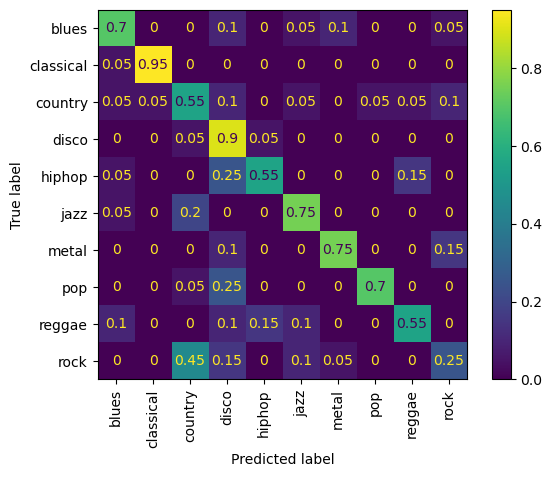

In [94]:
with torch.no_grad():
    temp_net.eval()
    y_hat = top1_cnn(X_test.to(device)).cpu()
    y_hat = torch.argmax(y_hat, dim=1)
    #y_test = label_encoder.transform(y_test)
    print(accuracy_score(y_test, y_hat))

    print(classification_report(target_transform(y_test), y_hat.cpu().numpy(), target_names=genres))
    cm(target_transform(y_test), y_hat.cpu().numpy())